In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set()

### Loading Olympic edition DataFrame

In [3]:
file_path = 'summer_olympic_medals\\Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'
editions = pd.read_csv(file_path, sep='\t')
editions.head(3)

,Edition,Bronze,Gold,Silver,Grand Total,City,Country
0,1896,40,64,47,151,Athens,Greece
1,1900,142,178,192,512,Paris,France
2,1904,123,188,159,470,St. Louis,United States


In [4]:
editions = editions[['Edition','Grand Total', 'City', 'Country']]
editions.tail(3)

,Edition,Grand Total,City,Country
23,2000,2015,Sydney,Australia
24,2004,1998,Athens,Greece
25,2008,2042,Beijing,China


In [5]:
file_path = 'summer_olympic_medals\\Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'
ioc_codes = pd.read_csv(file_path)
ioc_codes = ioc_codes[['Country','NOC']]
ioc_codes.tail()

,Country,NOC
196,Vietnam,VIE
197,Virgin Islands*,ISV
198,Yemen,YEM
199,Zambia,ZAM
200,Zimbabwe,ZIM


In [6]:
file_path = 'summer_olympic_medals\\Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv'
medals = pd.read_csv(file_path, sep='\t', skiprows=4)
medals.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


In [7]:
medals = medals[['Athlete', 'NOC', 'Medal','Edition']]
medals.tail(3)

,Athlete,NOC,Medal,Edition
29213,"PATRIKEEV, Yuri",ARM,Bronze,2008
29214,"LOPEZ, Mijain",CUB,Gold,2008
29215,"BAROEV, Khasan",RUS,Silver,2008


In [8]:
medal_counts = medals.pivot_table(index='Edition',
                                 columns='NOC',
                                 values='Athlete',
                                 aggfunc='count')
medal_counts.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
totals = editions.set_index('Edition')
totals.head()

,Grand Total,City,Country
Edition,,,
1896,151,Athens,Greece
1900,512,Paris,France
1904,470,St. Louis,United States
1908,804,London,United Kingdom
1912,885,Stockholm,Sweden


In [10]:
totals = totals['Grand Total']
totals.head()

Edition
1896    151
1900    512
1904    470
1908    804
1912    885
Name: Grand Total, dtype: int64

In [11]:
fractions = medal_counts.divide(totals, axis='rows')
fractions.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113,NaN,NaN,...,NaN,NaN,0.132450,NaN,NaN,NaN,NaN,NaN,NaN,0.039735
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.009766,0.011719,NaN,NaN,...,NaN,NaN,0.107422,NaN,NaN,NaN,NaN,NaN,NaN,0.066406
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002128,NaN,NaN,...,NaN,NaN,0.838298,NaN,NaN,NaN,NaN,NaN,NaN,0.017021
1908,NaN,NaN,NaN,0.023632,NaN,NaN,NaN,0.001244,NaN,NaN,...,NaN,NaN,0.078358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,0.011299,NaN,NaN,NaN,0.015819,NaN,NaN,...,NaN,NaN,0.114124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
mean_fractions = fractions.expanding().mean()
mean_fractions.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113,NaN,NaN,...,NaN,NaN,0.132450,NaN,NaN,NaN,NaN,NaN,NaN,0.039735
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.011505,0.022416,NaN,NaN,...,NaN,NaN,0.119936,NaN,NaN,NaN,NaN,NaN,NaN,0.053071
1904,NaN,NaN,NaN,NaN,NaN,NaN,0.011505,0.015653,NaN,NaN,...,NaN,NaN,0.359390,NaN,NaN,NaN,NaN,NaN,NaN,0.041054
1908,NaN,NaN,NaN,0.023632,NaN,NaN,0.011505,0.012051,NaN,NaN,...,NaN,NaN,0.289132,NaN,NaN,NaN,NaN,NaN,NaN,0.041054
1912,NaN,NaN,NaN,0.017466,NaN,NaN,0.011505,0.012804,NaN,NaN,...,NaN,NaN,0.254131,NaN,NaN,NaN,NaN,NaN,NaN,0.041054


In [13]:
fractions_change = mean_fractions.pct_change() * 100
fractions_change.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,NaN,...,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384
1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510,NaN,NaN,...,NaN,NaN,-19.549222,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438,NaN,NaN,...,NaN,NaN,-12.105733,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [14]:
fractions_change = fractions_change.reset_index()
fractions_change.head()

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,...,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384
3,1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510,NaN,...,NaN,NaN,-19.549222,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438,NaN,...,NaN,NaN,-12.105733,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Reshaping and plotting

In [15]:
hosts = pd.merge(editions, ioc_codes, how='left')
hosts.head()

,Edition,Grand Total,City,Country,NOC
0,1896,151,Athens,Greece,GRE
1,1900,512,Paris,France,FRA
2,1904,470,St. Louis,United States,USA
3,1908,804,London,United Kingdom,GBR
4,1912,885,Stockholm,Sweden,SWE


In [16]:
hosts = hosts[['Edition','NOC']].set_index('Edition')
hosts.head()

,NOC
Edition,
1896,GRE
1900,FRA
1904,USA
1908,GBR
1912,SWE


In [17]:
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN


In [18]:
hosts = hosts.reset_index()
hosts

,Edition,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE
5,1920,BEL
6,1924,FRA
7,1928,NED
8,1932,USA
9,1936,GER


In [20]:
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='Change')

In [22]:
reshaped.tail()

,Edition,NOC,Change
3583,1992,ZZX,0.0
3584,1996,ZZX,0.0
3585,2000,ZZX,0.0
3586,2004,ZZX,0.0
3587,2008,ZZX,0.0


In [23]:
chn = reshaped.loc[reshaped['NOC'] == 'CHN']
chn

,Edition,NOC,Change
546,1896,CHN,NaN
547,1900,CHN,NaN
548,1904,CHN,NaN
549,1908,CHN,NaN
550,1912,CHN,NaN
551,1920,CHN,NaN
552,1924,CHN,NaN
553,1928,CHN,NaN
554,1932,CHN,NaN
555,1936,CHN,NaN


In [25]:
merged = pd.merge(reshaped, hosts)
merged

,Edition,NOC,Change
0,1956,AUS,54.615063
1,2000,AUS,12.554986
2,1920,BEL,54.757887
3,1976,CAN,-2.143977
4,2008,CHN,13.251332
5,1992,ESP,32.943248
6,1952,FIN,0.121662
7,1900,FRA,198.002486
8,1924,FRA,2.046362
9,1972,FRG,35.228623


In [28]:
influence = merged.set_index('Edition').sort_index()
influence.tail()

,NOC,Change
Edition,,
1992,ESP,32.943248
1996,USA,-1.010378
2000,AUS,12.554986
2004,GRE,-2.478635
2008,CHN,13.251332


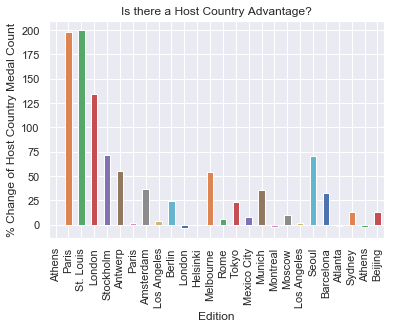

In [33]:
change = influence['Change']
ax = change.plot(kind='bar')
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])
plt.show()